In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('RuFoLa.csv')
df = df.replace(1, 2)
df = df.replace(3, 4)
df = df.replace(5, 6)
df

,level,text
0,2,Это мой друг. Это моя подруга. Это мой дом. Эт...
1,2,Это я. Меня зовут Анна. Я студентка.Это мой от...
2,2,Это Иван Петрович Сидоров. А это его ученики. ...
3,2,Мы изучаем русский ЯЗЫК.Это наша аудитория. Се...
4,2,Наш город.Петербург.Он не очень старый. Здесь ...
...,...,...
838,6,"Пользователи, поддерживающие акцию, также ссыл..."
839,6,"Движение Ice Bucket Challenge, начавшееся как ..."
840,6,Российские филантропы в августе и начале сентя...
841,6,Совместные исследования $ВЦИОМ$$ и проекта Доб...


## Split Sentences

In [4]:
final = pd.DataFrame(columns=['level', 'text'])

for level_label in range(1, 7):
    level = df[df['level'] == level_label]
    level_list = level['text'].to_list()
    sentences_splited = [sentence for text in level_list for sentence in text.split(".") if len(sentence) >= 50] # 50 is the sentence lenght, I tried to avoid very small sentences
    label = [level_label for i in sentences_splited]
    temp = pd.DataFrame(list(zip(label, sentences_splited)), columns=['level', 'text'])
    final = pd.concat([final, temp], ignore_index=True)

final.level = final.level.astype('int')
final

,level,text
0,2,"— финка, она — экскурсовод, её родной язык фи..."
1,2,"Клаус — известный немецкий журналист, но он х..."
2,2,"Как вы думаете, какой мой родной язык? Правил..."
3,2,Мы все изучаем русский язык и хорошо говорим ...
4,2,Мы ещё плохо знаем русский язык и говорим мед...
...,...,...
15614,6,"Как оказалось, эта крыша была запрещённой зон..."
15615,6,"Меня допросили, осмотрели место происшествия ..."
15616,6,"Сотрудники полиции сказали, что правонарушени..."
15617,6,Но об этом происшествии узнало моё начальство...


## Clean Text

In [5]:
import re

def clean(text):
    text = re.sub( r'\s+', ' ', text)
    text = re.sub( r'[^\w]', ' ', text)
    text = re.sub( r' +', ' ', text)

    return text

In [6]:
final['clean_text'] = final['text'].map(clean)
final

,level,text,clean_text
0,2,"— финка, она — экскурсовод, её родной язык фи...",финка она экскурсовод её родной язык финский
1,2,"Клаус — известный немецкий журналист, но он х...",Клаус известный немецкий журналист но он хоро...
2,2,"Как вы думаете, какой мой родной язык? Правил...",Как вы думаете какой мой родной язык Правильн...
3,2,Мы все изучаем русский язык и хорошо говорим ...,Мы все изучаем русский язык и хорошо говорим ...
4,2,Мы ещё плохо знаем русский язык и говорим мед...,Мы ещё плохо знаем русский язык и говорим мед...
...,...,...,...
15614,6,"Как оказалось, эта крыша была запрещённой зон...",Как оказалось эта крыша была запрещённой зоно...
15615,6,"Меня допросили, осмотрели место происшествия ...",Меня допросили осмотрели место происшествия с...
15616,6,"Сотрудники полиции сказали, что правонарушени...",Сотрудники полиции сказали что правонарушения...
15617,6,Но об этом происшествии узнало моё начальство...,Но об этом происшествии узнало моё начальство...


## Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

shuffled = final.sample(frac=1, random_state=42).reset_index()

X_train, X_test, y_train, y_test = train_test_split(shuffled['text'], shuffled['level'], test_size=0.2, random_state=42, stratify=shuffled['level'])

len(X_train), len(X_test), len(y_train), len(y_test)

(12495, 3124, 12495, 3124)

## Bag of Words

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

countvect = CountVectorizer(min_df=10, ngram_range=(1,1))
X_train_tf = countvect.fit_transform(X_train)

## SVC

In [9]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train_tf, y_train)

F:\buythedip\venv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

F:\buythedip\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.692381562099872
              precision    recall  f1-score   support

           2       0.60      0.52      0.56       729
           4       0.75      0.85      0.79      2044
           6       0.30      0.14      0.19       351

    accuracy                           0.69      3124
   macro avg       0.55      0.50      0.51      3124
weighted avg       0.66      0.69      0.67      3124



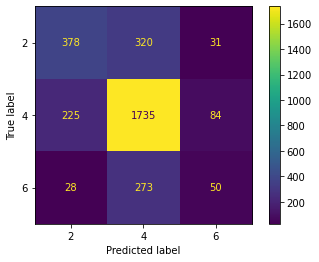

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report

X_test_tf = countvect.transform(X_test)
y_pred = model.predict(X_test_tf)

print(accuracy_score(y_test, y_pred))
plot_confusion_matrix(model, X_test_tf, y_test)
print(classification_report(y_test, y_pred))

## Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_tf, y_train)

F:\buythedip\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

F:\buythedip\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.7112676056338029
              precision    recall  f1-score   support

           2       0.65      0.52      0.58       729
           4       0.74      0.88      0.81      2044
           6       0.38      0.13      0.19       351

    accuracy                           0.71      3124
   macro avg       0.59      0.51      0.53      3124
weighted avg       0.68      0.71      0.68      3124



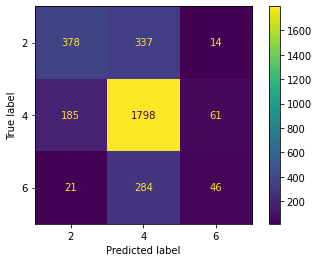

In [12]:
X_test_tf = countvect.transform(X_test)
y_pred = model.predict(X_test_tf)

print(accuracy_score(y_test, y_pred))
plot_confusion_matrix(model, X_test_tf, y_test)
print(classification_report(y_test, y_pred))

## Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_tf, y_train)

RandomForestClassifier()

0.6962227912932138


F:\buythedip\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           2       0.66      0.36      0.47       729
           4       0.71      0.92      0.80      2044
           6       0.35      0.07      0.11       351

    accuracy                           0.70      3124
   macro avg       0.57      0.45      0.46      3124
weighted avg       0.66      0.70      0.65      3124



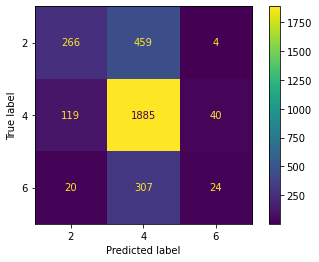

In [14]:
X_test_tf = countvect.transform(X_test)
y_pred = model.predict(X_test_tf)

print(accuracy_score(y_test, y_pred))
plot_confusion_matrix(model, X_test_tf, y_test)
print(classification_report(y_test, y_pred))